<a href="https://colab.research.google.com/github/mykon23/DL-2020Project/blob/overfit/Equus2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the Equus dataset

In [16]:
! wget -O Horse.tar.gz https://github.com/mykon23/DL-2020Project/blob/master/Horse.tar.gz?raw=true
! wget -O Donkey.tar.gz https://github.com/mykon23/DL-2020Project/blob/master/Donkey.tar.gz?raw=true
! wget -O Zebra.tar.gz https://github.com/mykon23/DL-2020Project/blob/master/Zebra.tar.gz?raw=true

--2020-03-10 04:30:46--  https://github.com/mykon23/DL-2020Project/blob/master/Horse.tar.gz?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mykon23/DL-2020Project/raw/master/Horse.tar.gz [following]
--2020-03-10 04:30:46--  https://github.com/mykon23/DL-2020Project/raw/master/Horse.tar.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mykon23/DL-2020Project/master/Horse.tar.gz [following]
--2020-03-10 04:30:46--  https://raw.githubusercontent.com/mykon23/DL-2020Project/master/Horse.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting resp

In [17]:
! ls -hl

total 47M
-rw-r--r-- 1 root root  18M Mar 10 04:30 Donkey.tar.gz
drwxr-xr-x 5 root root 4.0K Mar 10 04:17 Equus
-rw-r--r-- 1 root root  12M Mar 10 04:30 Horse.tar.gz
drwxr-xr-x 1 root root 4.0K Mar  3 18:11 sample_data
-rw-r--r-- 1 root root  17M Mar 10 04:30 Zebra.tar.gz


In [0]:
##Create stage location
! rm -rf Equus/
! mkdir Equus

In [0]:
##Extract data into directory
! tar -zxf Horse.tar.gz -C Equus/
! tar -zxf Donkey.tar.gz -C Equus/
! tar -zxf Zebra.tar.gz -C Equus/

In [0]:
! rm *.tar.gz

In [21]:
## Display the distribution of samples
! for d in $(ls ./Equus); do samples=$(ls -l ./Equus/${d} | wc -l); echo ${d} ${samples}; done

Donkey 392
Horse 315
Zebra 340


Update Samples to Meet Square Dimensions

In [0]:
import numpy
import os
import PIL
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

##Set all the images to be of the same size
samples_dir = os.path.join('Equus', '.')
for eq_cl in os.listdir(samples_dir):
  cl_dir = os.path.join(samples_dir, eq_cl)
  for dat in os.listdir(cl_dir):
    image = Image.open(os.path.join(cl_dir, dat))
    img_p = image.resize((256, 256))
    ##overwrite existing image
    img_p.save(os.path.join(cl_dir, dat))

In [23]:
##Download the files from colab
from google.colab import files
! tar zcvf Equus.tar.gz Equus/
files.download('Equus.tar.gz')

Equus/
Equus/Horse/
Equus/Horse/animal-580375__340.jpg
Equus/Horse/mare-4170531__340.jpg
Equus/Horse/shire-horse-4421896__340.jpg
Equus/Horse/horses-2025924__340.jpg
Equus/Horse/horse-3048740__340.jpg
Equus/Horse/cowboy-757575__340.jpg
Equus/Horse/horses-1984977__340.jpg
Equus/Horse/horses-1040952__340.jpg
Equus/Horse/quarter-horse-3390243__340.jpg
Equus/Horse/prairie-1025230__340.jpg
Equus/Horse/horse-4512673__340.jpg
Equus/Horse/horse-4309736__340.jpg
Equus/Horse/horse-943010__340.jpg
Equus/Horse/horse-1437056__340.jpg
Equus/Horse/horse-3609347__340.jpg
Equus/Horse/horse-419743__340.jpg
Equus/Horse/horse-2144514__340.jpg
Equus/Horse/horse-2030939__340.jpg
Equus/Horse/shire-horse-2197214__340.jpg
Equus/Horse/horses-2180584__340.jpg
Equus/Horse/horse-419156__340.jpg
Equus/Horse/iceland-horses-4649468__340.jpg
Equus/Horse/horse-1853122__340.jpg
Equus/Horse/horse-4013966__340.jpg
Equus/Horse/horse-1144061__340.jpg
Equus/Horse/horse-1330690__340.jpg
Equus/Horse/horse-2147884__340.jpg
Equu

Image Data Generator

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)

In [25]:
# Specify how the ImageDataGenerator will read/deliver
image_generator = my_generator.flow_from_directory('./Equus', target_size=(256, 256), batch_size=12, class_mode='categorical')

Found 1044 images belonging to 3 classes.


Using TensorFlow backend.


Use as map between images and labels
['Donkey', 'Horse', 'Zebra']


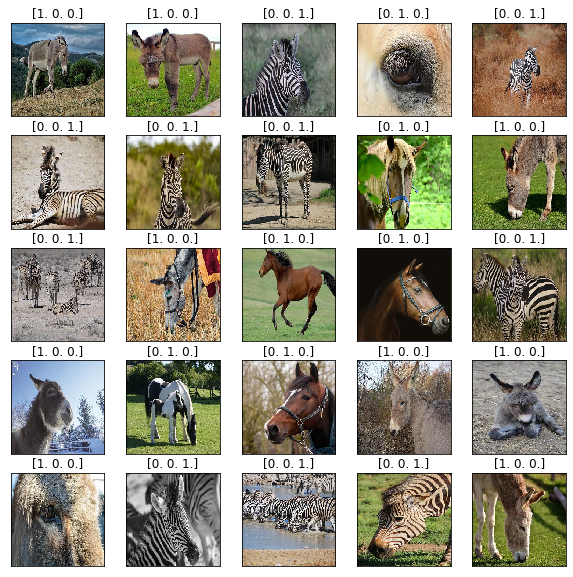

In [26]:
import matplotlib.pyplot as plt
import os
import numpy as np
from keras.preprocessing import image

rows = 5
cols = 5
figure = plt.figure(figsize=(2 * rows, 2 * cols))
##Use as map for mapping image to class
lbls = (sorted(os.listdir('Equus')))
print("Use as map between images and labels")
print(lbls)

ax = []
cur_samples = 0
complete = False

for batch in image_generator:
  images = batch[0]
  labels = batch[1]
  for i in range(len(labels)):
    cur_samples += 1
    if cur_samples <= (rows * cols):
      ax.append(figure.add_subplot(rows, cols, cur_samples))
      ax[-1].set_title(str(labels[i]))
      imgplot = plt.imshow(image.array_to_img( images[i,:,:,:] ) )
    else:
      complete = True
      break
  if complete:
    break
plt.setp(ax, xticks = [], yticks = []) 
plt.show()

Build an Initial Overfitting Model


> The objective is to build an overfitting model with many layers and filters to acquire an initial benchmark for overfitting.





In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)
# Specify how the ImageDataGenerator will read/deliver
image_generator = my_generator.flow_from_directory('./Equus', target_size=(256, 256), batch_size=12, class_mode='categorical')

Found 1044 images belonging to 3 classes.


Create the Convolution Network

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 3, activation = 'softmax' ) )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2032128)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6096387   
Total params: 6,106,531
Trainable params: 6,106,531
Non-trainable params: 0
_________________________________________________________________


In [0]:
##Compile the model
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )

In [30]:
##Train the model
history = model.fit_generator(
    image_generator,
    steps_per_epoch=87,
    epochs=10)

Epoch 1/10
87/87 [==============================] - 85s 982ms/step - loss: 3.6443 - acc: 0.5326
Epoch 2/10
87/87 [==============================] - 85s 974ms/step - loss: 0.4350 - acc: 0.8563
Epoch 3/10
87/87 [==============================] - 85s 973ms/step - loss: 0.0965 - acc: 0.9780
Epoch 4/10
87/87 [==============================] - 84s 969ms/step - loss: 0.0209 - acc: 0.9981
Epoch 5/10
87/87 [==============================] - 84s 967ms/step - loss: 0.0033 - acc: 1.0000
Epoch 6/10
87/87 [==============================] - 84s 968ms/step - loss: 5.9384e-04 - acc: 1.0000
Epoch 7/10
87/87 [==============================] - 84s 968ms/step - loss: 3.3727e-04 - acc: 1.0000
Epoch 8/10
87/87 [==============================] - 85s 977ms/step - loss: 2.3948e-04 - acc: 1.0000
Epoch 9/10
87/87 [==============================] - 84s 968ms/step - loss: 1.7829e-04 - acc: 1.0000
Epoch 10/10
87/87 [==============================] - 84s 969ms/step - loss: 1.4374e-04 - acc: 1.0000


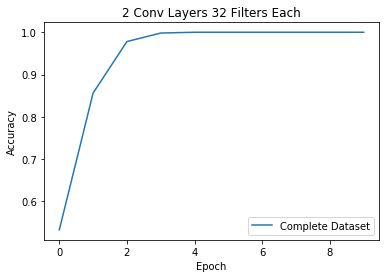

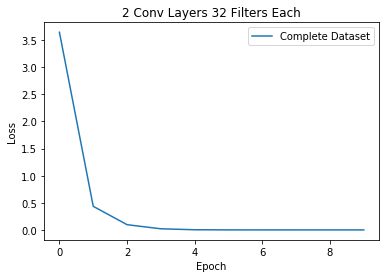

In [31]:
##plot the learning curve of the overfitted model
import matplotlib.pyplot as plt

title = '2 Conv Layers 32 Filters Each'

plt.plot(history.history['acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()

Performance Dependence on Number of Layers


> Observe how the number of layers with fixed filters affects the performance of the convolution neural network.





In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)
# Specify how the ImageDataGenerator will read/deliver
image_generator = my_generator.flow_from_directory('./Equus', target_size=(256, 256), batch_size=12, class_mode='categorical')

Found 1044 images belonging to 3 classes.


Single Convolution Layer Evaluation

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( Flatten() )
model.add( Dense( 3, activation = 'softmax' ) )
model.summary()

##Compile the model
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )

##Train the model
history = model.fit_generator(
    image_generator,
    steps_per_epoch=87,
    epochs=10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2064512)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6193539   
Total params: 6,194,435
Trainable params: 6,194,435
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
87/87 [==============================] - 18s 212ms/step - loss: 12.0694 - acc: 0.5048
Epoch 2/10
87/87 [==============================] - 18s 207ms/step - loss: 0.3632 - acc: 0.9042
Epoch 3/10
87/87 [==============================] - 18s 208ms/step - loss: 0.0760 - acc: 0.9904
Epoch 4/10
87/87 [==============================] - 18s 208ms/step - loss: 0.0379 - a

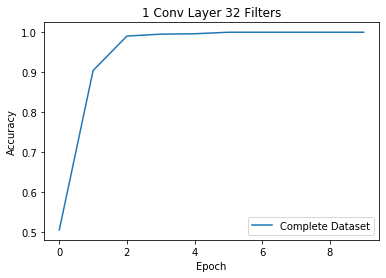

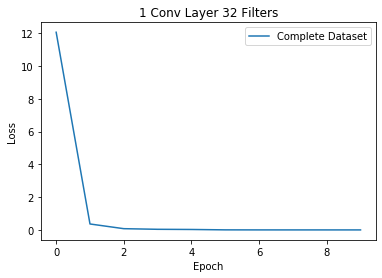

In [34]:
##plot the learning curve of the overfitted model
import matplotlib.pyplot as plt

title = '1 Conv Layer 32 Filters'

plt.plot(history.history['acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()

Performance Dependence on Filters


> Observe the manner in which the number of filters per layer affects the performance of the convolution neural network.



In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)
# Specify how the ImageDataGenerator will read/deliver
image_generator = my_generator.flow_from_directory('./Equus', target_size=(256, 256), batch_size=12, class_mode='categorical')

Found 1044 images belonging to 3 classes.


Single Layer with 4 filters

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add( Conv2D( 4, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( Flatten() )
model.add( Dense( 3, activation = 'softmax' ) )
model.summary()

##Compile the model
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )

##Train the model
history = model.fit_generator(
    image_generator,
    steps_per_epoch=87,
    epochs=10)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 4)       112       
_________________________________________________________________
flatten_3 (Flatten)          (None, 258064)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 774195    
Total params: 774,307
Trainable params: 774,307
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
87/87 [==============================] - 11s 123ms/step - loss: 7.2569 - acc: 0.5077
Epoch 2/10
87/87 [==============================] - 11s 121ms/step - loss: 0.6893 - acc: 0.7921
Epoch 3/10
87/87 [==============================] - 11s 121ms/step - loss: 0.1597 - acc: 0.9483
Epoch 4/10
87/87 [==============================] - 11s 121ms/step - loss: 0.0652 - acc: 0

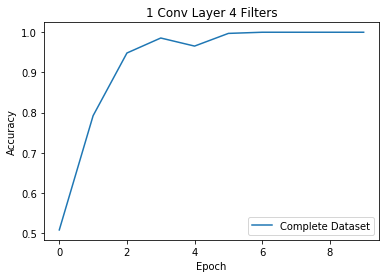

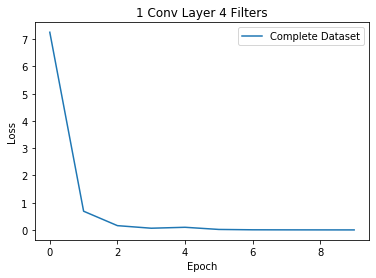

In [37]:
##plot the learning curve of the model
import matplotlib.pyplot as plt

title = '1 Conv Layer 4 Filters'

plt.plot(history.history['acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()

Single Layer with 8 Filters

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add( Conv2D( 8, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( Flatten() )
model.add( Dense( 3, activation = 'softmax' ) )
model.summary()

##Compile the model
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )

##Train the model
history = model.fit_generator(
    image_generator,
    steps_per_epoch=87,
    epochs=10)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 8)       224       
_________________________________________________________________
flatten_4 (Flatten)          (None, 516128)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 1548387   
Total params: 1,548,611
Trainable params: 1,548,611
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
87/87 [==============================] - 11s 125ms/step - loss: 1.3902 - acc: 0.5824
Epoch 2/10
87/87 [==============================] - 11s 122ms/step - loss: 0.3331 - acc: 0.9148
Epoch 3/10
87/87 [==============================] - 11s 122ms/step - loss: 0.1235 - acc: 0.9770
Epoch 4/10
87/87 [==============================] - 11s 122ms/step - loss: 0.0379 - ac

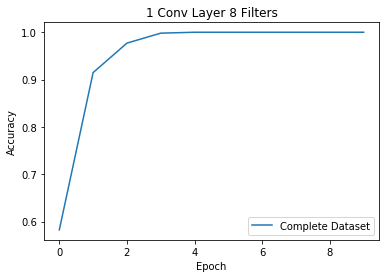

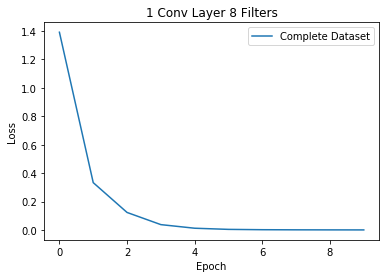

In [39]:
##plot the learning curve of the model
import matplotlib.pyplot as plt

title = '1 Conv Layer 8 Filters'

plt.plot(history.history['acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()

Single Layer with 16 filters

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( Flatten() )
model.add( Dense( 3, activation = 'softmax' ) )
model.summary()

##Compile the model
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )

##Train the model
history = model.fit_generator(
    image_generator,
    steps_per_epoch=87,
    epochs=10)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
flatten_5 (Flatten)          (None, 1032256)           0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 3096771   
Total params: 3,097,219
Trainable params: 3,097,219
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
87/87 [==============================] - 14s 156ms/step - loss: 35.7688 - acc: 0.5115
Epoch 2/10
87/87 [==============================] - 13s 152ms/step - loss: 0.3983 - acc: 0.8602
Epoch 3/10
87/87 [==============================] - 13s 151ms/step - loss: 0.1143 - acc: 0.9732
Epoch 4/10
87/87 [==============================] - 13s 152ms/step - loss: 0.0401 - a

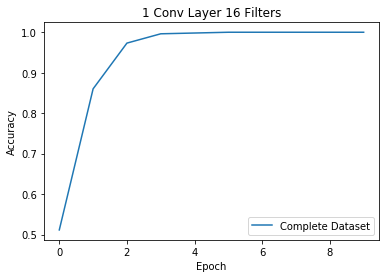

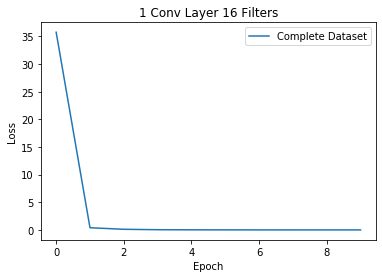

In [41]:
##plot the learning curve of the model
import matplotlib.pyplot as plt

title = '1 Conv Layer 16 Filters'

plt.plot(history.history['acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()

Two Layers with 4 Filters Each

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add( Conv2D( 4, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( Conv2D( 4, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 3, activation = 'softmax' ) )
model.summary()

##Compile the model
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )

##Train the model
history = model.fit_generator(
    image_generator,
    steps_per_epoch=87,
    epochs=10)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 254, 254, 4)       112       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 252, 252, 4)       148       
_________________________________________________________________
flatten_6 (Flatten)          (None, 254016)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 762051    
Total params: 762,311
Trainable params: 762,311
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
87/87 [==============================] - 23s 265ms/step - loss: 1.0618 - acc: 0.5125
Epoch 2/10
87/87 [==============================] - 23s 261ms/step - loss: 0.4571 - acc: 0.8467
Epoch 3/10
87/87 [==============================] - 23

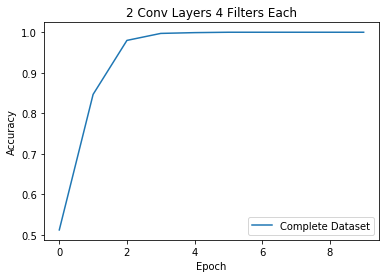

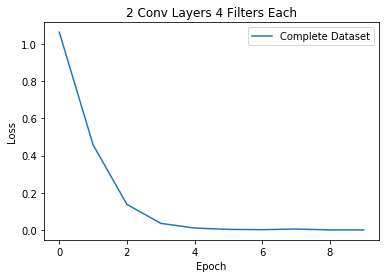

In [43]:
##plot the learning curve of the model
import matplotlib.pyplot as plt

title = '2 Conv Layers 4 Filters Each'

plt.plot(history.history['acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()


Two Layers with Variable Filters

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add( Conv2D( 4, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( Conv2D( 2, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 3, activation = 'softmax' ) )
model.summary()

##Compile the model
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )

##Train the model
history = model.fit_generator(
    image_generator,
    steps_per_epoch=87,
    epochs=10)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 4)       112       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 252, 252, 2)       74        
_________________________________________________________________
flatten_7 (Flatten)          (None, 127008)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 381027    
Total params: 381,213
Trainable params: 381,213
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
87/87 [==============================] - 23s 261ms/step - loss: 1.2018 - acc: 0.3669
Epoch 2/10
87/87 [==============================] - 22s 257ms/step - loss: 0.6610 - acc: 0.7557
Epoch 3/10
87/87 [==============================] - 22

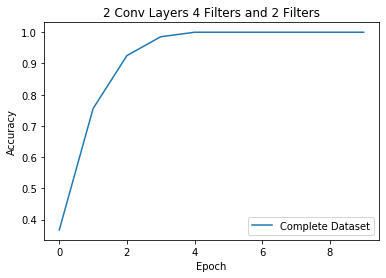

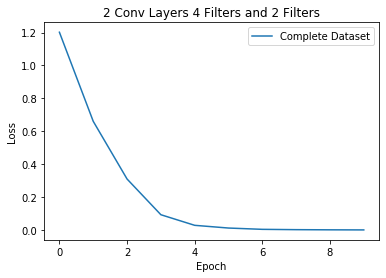

In [45]:
##plot the learning curve of the model
import matplotlib.pyplot as plt

title = '2 Conv Layers 4 Filters and 2 Filters'

plt.plot(history.history['acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()

Three Layers with 4 Filters Each

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add( Conv2D( 4, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( Conv2D( 4, ( 3, 3 ), activation = 'relu' ) )
model.add( Conv2D( 4, ( 3, 3 ), activation = 'relu') )
model.add( Flatten() )
model.add( Dense( 3, activation = 'softmax' ) )
model.summary()

##Compile the model
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )

##Train the model
history = model.fit_generator(
    image_generator,
    steps_per_epoch=87,
    epochs=10)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 254, 254, 4)       112       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 252, 252, 4)       148       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 250, 250, 4)       148       
_________________________________________________________________
flatten_8 (Flatten)          (None, 250000)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 750003    
Total params: 750,411
Trainable params: 750,411
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
87/87 [==============================] - 36s 408ms/step - loss: 1.2308 - acc: 0.4521
Epoch 2/10
87/87 [

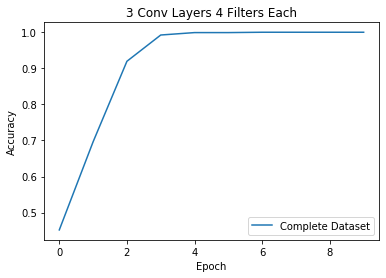

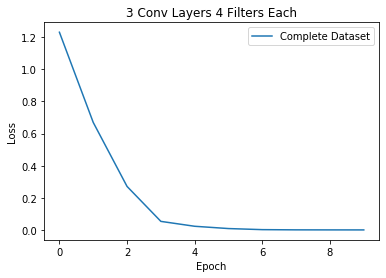

In [47]:
##plot the learning curve of the model
import matplotlib.pyplot as plt

title = '3 Conv Layers 4 Filters Each'

plt.plot(history.history['acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()

Minimum Neural Network Architecture to Overfit when Output in Channel


> Idenfity the minimum architecture required to overfit the dataset when the input channel contains the label.



In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)
# Specify how the ImageDataGenerator will read/deliver
image_generator = my_generator.flow_from_directory('./Equus', target_size=(256, 256), batch_size=12, class_mode='categorical')

Found 1044 images belonging to 3 classes.


In [0]:
import numpy as np

samples = 1044
##Convert the 3 channel rgb to 6 channels (3 RGB + 3 Donkey/Horse/Zebra)
x_train = np.zeros( shape=( samples, 256, 256, 6))
y_train = np.zeros(shape=(samples, 3))

cur = 0
complete = False

for batch in image_generator:
  if complete:
    break
  images = batch[0]
  labels = batch[1]
  for im in range(len(images)):
    existing = images[im]
    newchannel = np.zeros( (256, 256, 1) ) + labels[im]
    x = np.concatenate( (existing, newchannel), axis = -1)
    x_train[cur] = x
    y_train[cur] = labels[im]
    cur += 1
    if cur == samples:
      complete = True
      break


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add( Conv2D( 2, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 6) ) )
model.add( Flatten() )
model.add( Dense( 3, activation = 'softmax' ) )
model.summary()

##Compile the model
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )

##Train the model
history = model.fit(x_train, y_train, epochs=10)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 254, 254, 2)       110       
_________________________________________________________________
flatten_11 (Flatten)         (None, 129032)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 387099    
Total params: 387,209
Trainable params: 387,209
Non-trainable params: 0
_________________________________________________________________
Train on 1044 samples
Epoch 1/10
1044/1044 [==============================] - 13s 13ms/sample - loss: 0.7448 - acc: 0.6542
Epoch 2/10
1044/1044 [==============================] - 13s 12ms/sample - loss: 0.6583 - acc: 0.6992
Epoch 3/10
1044/1044 [==============================] - 13s 12ms/sample - loss: 0.3160 - acc: 0.9023
Epoch 4/10
1044/1044 [==============================

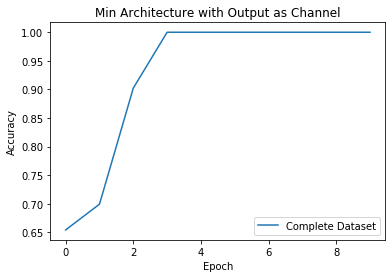

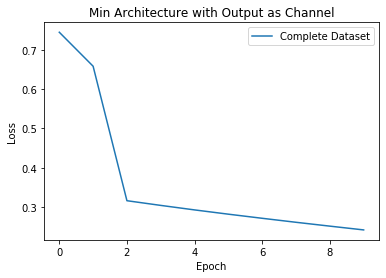

In [54]:
##plot the learning curve of the model
import matplotlib.pyplot as plt

title = 'Min Architecture with Output as Channel'

plt.plot(history.history['acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()